<a href="https://colab.research.google.com/github/archimedes77/archimedes77/blob/main/Weather_Forecast_System_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the fundamental libraries of data science

import pandas as pd                       # For Data Analysis and Preprocessing
import numpy as np                        # For Mathematical Operations on Data
import matplotlib.pyplot as plt           # For Visualization and Setting Graph Elements
import seaborn as sns                     # Consists of Easy and Interactive Statistical Graphics

In [ ]:
url = "https://raw.githubusercontent.com/AmanCSE-1/Smart-Weather-Prediction-using-ML/main/India%20Weather%20History.csv"
df = pd.read_csv(url)                     # Reading the Dataset

df.head()                                 # Printing the First 5 Rows of the Dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.shape                          # Returns the number of rows and number of columns of dataset

(96453, 12)

In [ ]:
df.columns                        # Returns the name of columns of dataset


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
df.info()           # to get a consice summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# Converts arguement to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Checking the datatype of the column by using dtype attribute
df['Formatted Date'].dtype

datetime64[ns, UTC]

In [ ]:
import datetime as dt

# Extracting Date (yyyy-mm-dd) from 'Formatted Date' column
df['Date'] = df['Formatted Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Time (hh) from 'Formatted Date' column (Note: We are only extracting hour because all observations have {mm-ss} as {00-00})
df['Time'] = df['Formatted Date'].dt.hour

df.drop(columns='Formatted Date', inplace=True)                 # Now, we drop the Formatted Date column

In [ ]:
# We want to place the recently created columns-'Date' and 'Time' as first two columns in our DataFrame
# So, first we pop them out and insert them into 0th and 1th position respectively

first_column = df.pop('Date')
second_column = df.pop('Time')

df.insert(0, 'Date', first_column)
df.insert(1, 'Time', second_column)

In [ ]:
df.head()

,Date,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31,22,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31,23,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01,0,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01,1,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01,2,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.describe()         # Used to describe various statistical measures for quantitative columns
                      # Mean, Median(Q2) describes the characteristic of distribution of column
                      # 25% (Q1),  50% (Q2) and 75 (Q3) are Quartiles of the features.
                      # std is Standard Deviation i.e. depicts spread  of the distribution
                      # min and max are known to everybody :)

,Date,Time,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,2011-07-02 08:10:33.311560960,11.499891,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
min,2005-12-31 00:00:00,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2008-10-01 00:00:00,6.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,2011-07-02 00:00:00,11.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,2014-04-02 00:00:00,17.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,2016-12-31 00:00:00,23.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000
std,NaN,6.922049,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906


In [ ]:
df.isna().sum()             # Returns the sum of rows that contains null values for each column


Date                          0
Time                          0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
month = df['Date'].dt.month

monthly_avg = df.groupby(month)['Temperature (C)'].mean()

In [ ]:
# Dropping the 'Loud Cover' Column as it contains all rows with value '0'.
# It will not add any value to the model

df.drop('Loud Cover', axis=1, inplace=True)

In [ ]:
month = df['Date'].dt.month

monthly_avg = df.groupby(month)['Temperature (C)'].mean()

In [ ]:
year = df['Date'].dt.year

annual_avg = df.groupby(year)['Temperature (C)'].mean()

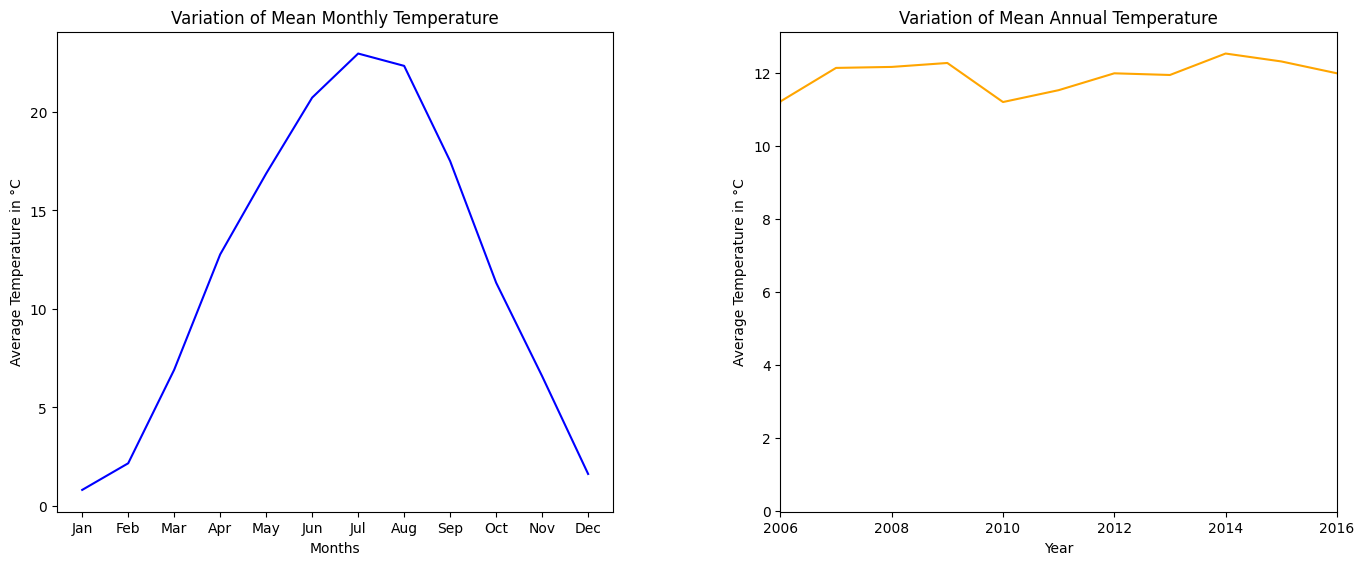

In [ ]:
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

plt.subplot(1, 2, 1)
month_abb = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.lineplot(x=month_abb, y=monthly_avg.values, color='blue', linestyle="-")
plt.xlabel('Months')
plt.ylabel("Average Temperature in \N{DEGREE SIGN}C")
plt.title('Variation of Mean Monthly Temperature')

plt.subplot(1, 2, 2)
sns.lineplot(x=annual_avg.index, y=annual_avg.values, color='orange', linestyle="solid")
plt.xlim([2006, 2016])
plt.xlabel('Year')
plt.ylabel("Average Temperature in \N{DEGREE SIGN}C")
plt.title('Variation of Mean Annual Temperature')

plt.show()

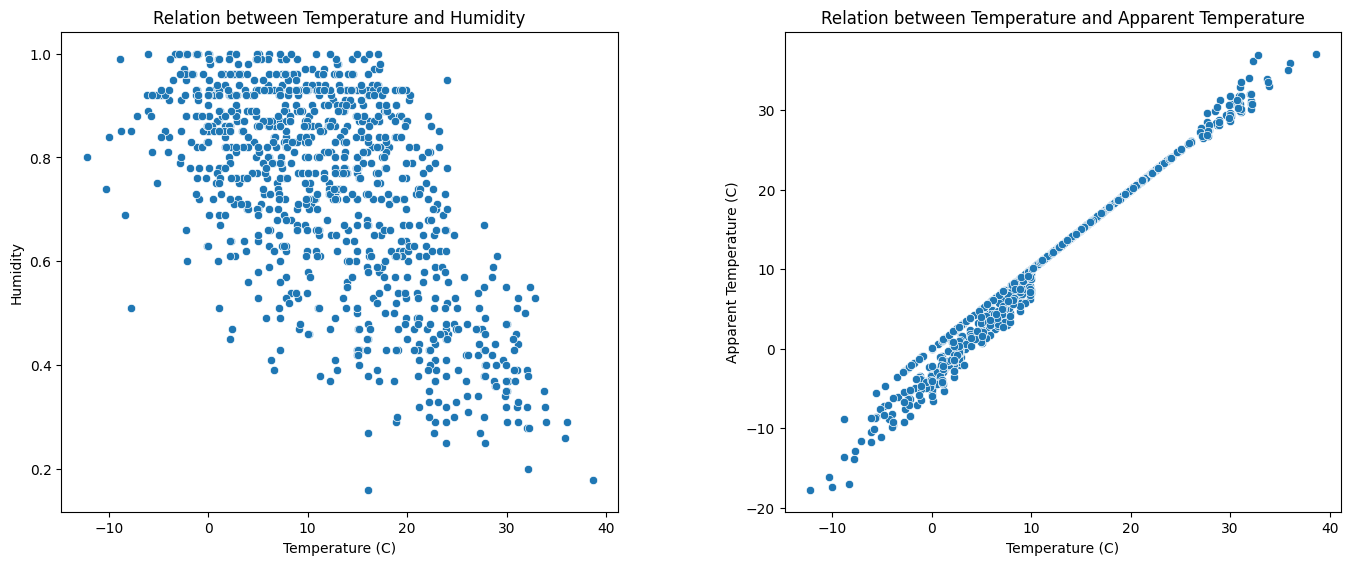

In [ ]:
# To visualize the relation between two columns, we will plot scatterplot
# Here, our predictor variable for Linear Regression model is Temperature

# used to adjust the subplot size and spacing between them
plt.subplots_adjust(left=0, right=2, bottom=0, top=1, wspace=0.3, hspace=0.1)

# First subplot - Relation between Temperature and Humidity
plt.subplot(1,2,1)
plt.title('Relation between Temperature and Humidity')
sns.scatterplot(data=df.sample(1000, random_state=1), x='Temperature (C)', y='Humidity')

# Second subplot - Relation between Temperature and Apparent Temperature
plt.subplot(1,2,2)
plt.title('Relation between Temperature and Apparent Temperature')
sns.scatterplot(data=df.sample(1000, random_state=1), x='Temperature (C)', y='Apparent Temperature (C)')

plt.show()

In [ ]:
df['Summary'].value_counts()


Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [ ]:
df['Precip Type'].nunique()


2

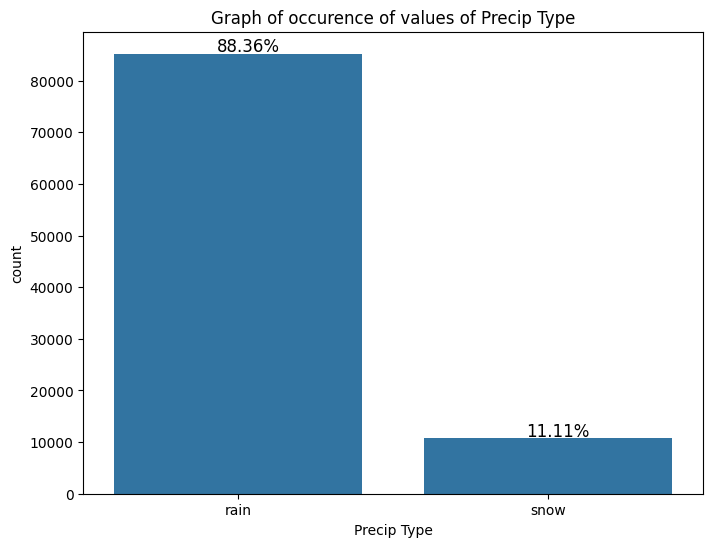

In [ ]:
plt.figure(figsize=(8,6))
precip = sns.countplot(x=df['Precip Type'])
plt.title('Graph of occurence of values of Precip Type')

for p in precip.patches:
  txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
  txt_x = p.get_x() + p.get_width()/2 -0.07
  txt_y = p.get_height()+400
  precip.text(txt_x, txt_y, txt, size=12)

plt.show()

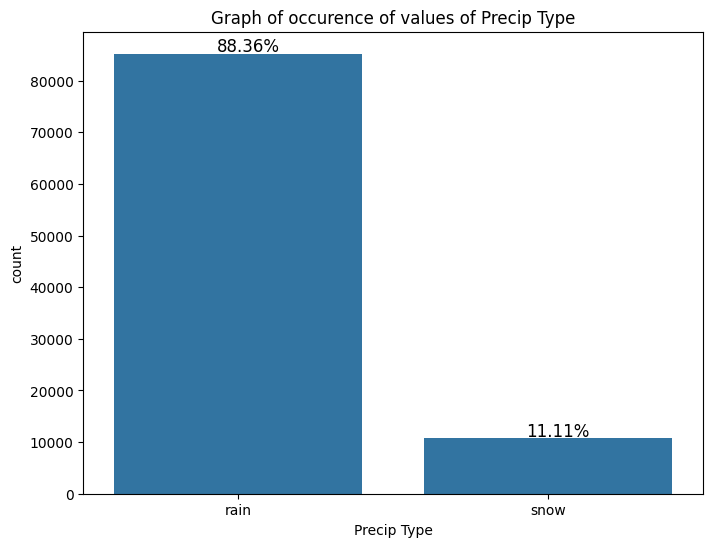

In [ ]:
plt.figure(figsize=(8,6))
precip = sns.countplot(x=df['Precip Type'])
plt.title('Graph of occurence of values of Precip Type')

for p in precip.patches:
  txt = str(round(p.get_height()/df.shape[0]*100, 2)) + '%'
  txt_x = p.get_x() + p.get_width()/2 -0.07
  txt_y = p.get_height()+400
  precip.text(txt_x, txt_y, txt, size=12)

plt.show()

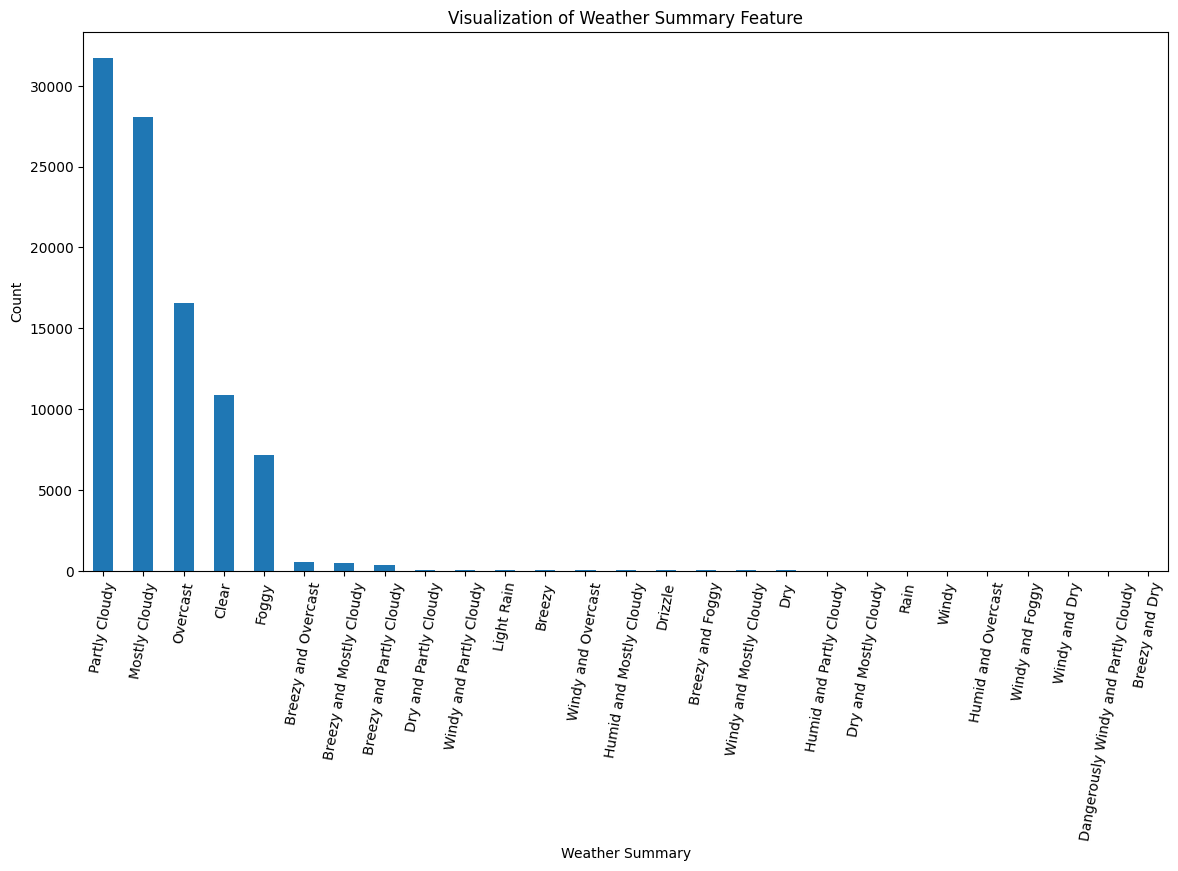

In [ ]:
plt.figure(figsize=(14,7))

df['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Visualization of Weather Summary Feature')
plt.xticks(rotation=80)
plt.show()

In [ ]:
# We will first estimate their percentage of occurence within the dataset.

# The below code uses "Boolean Masking" technique of python.
# Here, we will not consider the rows have ['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy' and 'Clear']
df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].shape[0]/df.shape[0]*100

2.0642178055633313

In [ ]:
# storing the index for unclean data for preprocessing
uncleanData_index = df[(df['Summary']!='Partly Cloudy') & (df['Summary']!='Mostly Cloudy') &
     (df['Summary']!='Overcast') & (df['Summary']!='Foggy') & (df['Summary']!='Clear')].index

In [ ]:
# Creating a copy of dataset
df_preprocessed = df.copy()

# Iterating through the unclean_data index
for row in uncleanData_index:

      # Using string matching technique
      if 'Partly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Partly Cloudy'

      elif 'Mostly Cloudy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Mostly Cloudy'

      elif 'Overcast' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Overcast'

      elif 'Foggy' in df_preprocessed['Summary'][row]:
          df_preprocessed.loc[row, 'Summary'] = 'Foggy'

In [ ]:
# We check that preprocessed data has retained all the rows of the original dataset

df_preprocessed.shape

(96453, 12)

In [ ]:
df_preprocessed['Summary'].value_counts()

Summary
Partly Cloudy     32290
Mostly Cloudy     28699
Overcast          17177
Clear             10890
Foggy              7187
Light Rain           63
Breezy               54
Drizzle              39
Dry                  34
Rain                 10
Windy                 8
Windy and Dry         1
Breezy and Dry        1
Name: count, dtype: int64

In [ ]:
uncleanData_index = df_preprocessed[(df_preprocessed['Summary']!='Partly Cloudy') & (df_preprocessed['Summary']!='Mostly Cloudy') &
     (df_preprocessed['Summary']!='Overcast') & (df_preprocessed['Summary']!='Foggy') & (df_preprocessed['Summary']!='Clear')].index

In [ ]:
uncleanData_index.shape[0]/df.shape[0]*100

0.21772262138036141

In [ ]:
df_preprocessed.drop(index=uncleanData_index, inplace=True)

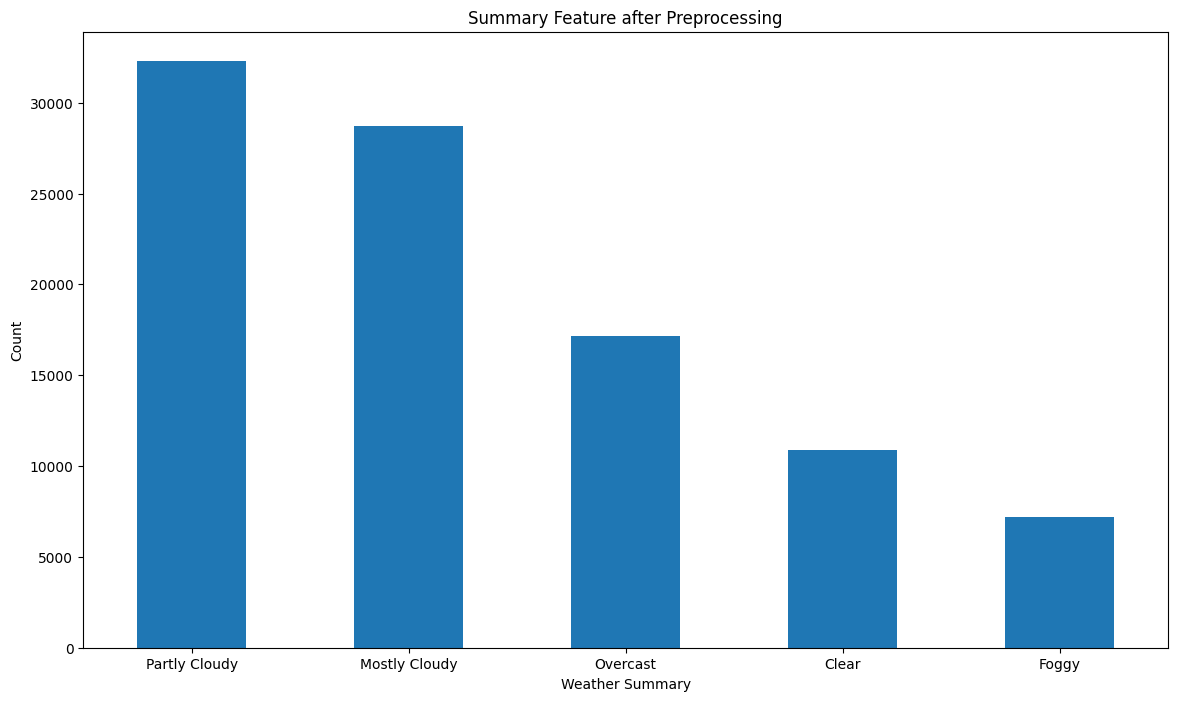

In [ ]:
plt.figure(figsize=(14,8))

df_preprocessed['Summary'].value_counts().plot(kind='bar')

plt.ylabel('Count')
plt.xlabel('Weather Summary')
plt.title('Summary Feature after Preprocessing')
plt.xticks(rotation=0)
plt.show()

In [ ]:
precip_na_index = df_preprocessed.loc[pd.isna(df_preprocessed['Precip Type']), :].index

for row in precip_na_index:
    if df_preprocessed.loc[row, 'Temperature (C)']<=0:
        df_preprocessed.loc[row, 'Precip Type'] = 'snow'
    else :
        df_preprocessed.loc[row, 'Precip Type'] = 'rain'

df_preprocessed['Precip Type'].isna().sum()

0

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report
import joblib

In [ ]:
## Model Selection - Splitting Training and Test Dataset
x = df_preprocessed.loc[:, ['Apparent Temperature (C)', 'Humidity']]
y = df_preprocessed.loc[:, 'Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
## Building the Model
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()

lrmodel.fit(x_train, y_train)
temp_predict = lrmodel.predict(x_test)

In [ ]:
## Linear regression Model Evaluation
r2_value = r2_score(temp_predict, y_test)
print("R-Squared Score of the Linear Regression Model is", round(r2_value, 4))

mean_sq_error = mean_squared_error(temp_predict, y_test)
print("Mean Square Error of the Linear Regression Model is", round(mean_sq_error, 2))

R-Squared Score of the Linear Regression Model is 0.9871
Mean Square Error of the Linear Regression Model is 1.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


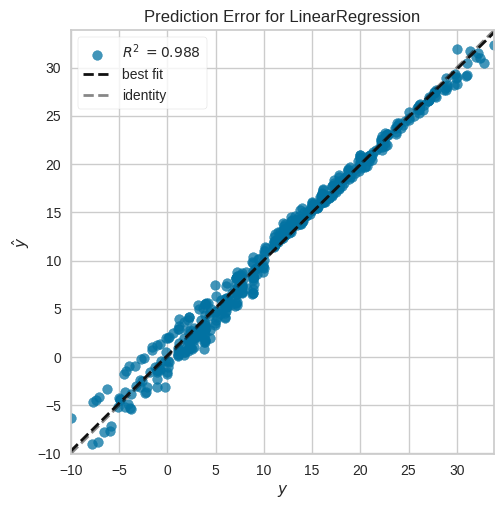

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
## Visualizing the Prediction
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lrmodel).fit(x_train, y_train)
visualizer.score(x_test.sample(500, random_state=1), y_test.sample(500, random_state=1))

visualizer.poof()

In [ ]:
## Encoding the Categorical Variables
lb = LabelBinarizer()

df_preprocessed['Precip Type Binary'] = lb.fit_transform(df_preprocessed['Precip Type'])
df_preprocessed['Precip Type Binary'].value_counts()

Precip Type Binary
0    85543
1    10700
Name: count, dtype: int64

In [ ]:
## Splitting Dataset
x = df_preprocessed.loc[:, ['Temperature (C)', 'Humidity', 'Visibility (km)']]
y = df_preprocessed.loc[:, 'Precip Type Binary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
## Building the Model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
precip_predict = logmodel.predict(x_test)


## Logistic Regression Model Evaluation
print("R-Squared Score of the Logistic Regression Model is", round(r2_score(precip_predict, y_test), 4))

print("Accuracy is", round(accuracy_score(y_test, precip_predict), 4))

R-Squared Score of the Logistic Regression Model is 0.9799
Accuracy is 0.998


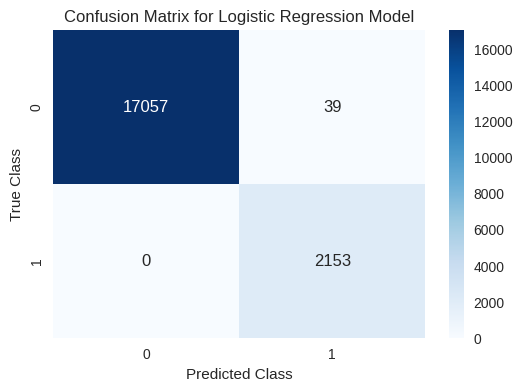

In [ ]:
plt.figure(figsize=(6, 4))
cf_matrix = confusion_matrix(y_test, precip_predict)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='0')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [ ]:
print(classification_report(y_test, precip_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17096
           1       0.98      1.00      0.99      2153

    accuracy                           1.00     19249
   macro avg       0.99      1.00      0.99     19249
weighted avg       1.00      1.00      1.00     19249



In [ ]:
user_input_temp = int(input('Enter the Temperature in Celsius : '))
user_input_humid = float(input('Enter the Humidity : '))
user_input_visiblity = float(input('Enter the Visibility : '))


result2 = logmodel.predict([[user_input_temp, user_input_humid, user_input_visiblity]])
result2 = lb.inverse_transform(result2)
print("Expected Precipitation Type is :", result2[0])

Enter the Temperature in Celsius : -10
Enter the Humidity : 20
Enter the Visibility : 7
Expected Precipitation Type is : snow


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_preprocessed['Month'] = df_preprocessed['Date'].dt.month


In [ ]:
le = LabelEncoder()

df_preprocessed['Summary Encoded'] = le.fit_transform(df_preprocessed.loc[:, 'Summary'])

x = df_preprocessed.loc[:, ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'Wind Speed (km/h)', 'Month']]
y = df_preprocessed.loc[:, 'Summary Encoded']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x, y = smote.fit_resample(x, y)

x.shape[0], y.shape[0]

(161450, 161450)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier  = GaussianNB()

classifier.fit(x_train, y_train)
summary_predict = classifier.predict(x_test)

print("Accuracy of Naive Bayes Algorithm is {}".format(round(accuracy_score(y_test, summary_predict), 2)*100))

Accuracy of Naive Bayes Algorithm is 50.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
summary_predict = knn.predict(x_test)

print("Accuracy of KNN Algorithm is " + '%.2f' %(round(accuracy_score(y_test, summary_predict), 2)*100))

Accuracy of KNN Algorithm is 63.00


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(max_depth=55, random_state=1)

rforest.fit(x_train, y_train)
summary_predict = rforest.predict(x_test)

print("Accuracy of Random Forest Algorithm is", round(accuracy_score(y_test, summary_predict), 2)*100)

Accuracy of Random Forest Algorithm is 76.0


In [ ]:
user_input = [30,0.10,0.1,1000, 45 ,10]

result3 = rforest.predict([user_input])
result3
print(le.inverse_transform(result3))


['Clear']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


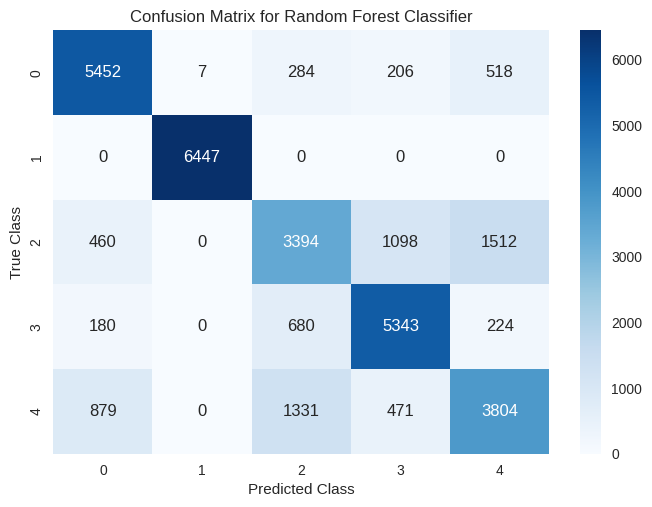

In [ ]:
plt.title('Confusion Matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, summary_predict), annot=True, fmt='0', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
print(classification_report(y_test, summary_predict))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6467
           1       1.00      1.00      1.00      6447
           2       0.60      0.53      0.56      6464
           3       0.75      0.83      0.79      6427
           4       0.63      0.59      0.61      6485

    accuracy                           0.76     32290
   macro avg       0.75      0.76      0.75     32290
weighted avg       0.75      0.76      0.75     32290

